# 测试不同模型

1.	multiple linear regression (MLR)
2.	backpropagation artificial neural network (BPNN)
3.	gradient boosting regression (GBR)
4.	extreme gradient boosting(XGBoost)
5.	RF
6.	support vector regression with radial basis kernel function (SVR-rbf)
7.	support vector regression with linear kernel function (SVR-lin)
8.	support vector regression with polynomial kernel function (SVR-poly)

## 处理数据

In [1]:
from matminer.featurizers.composition import alloy
from matminer.featurizers.conversions import StrToComposition

import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')

# Convert formula to composition
data = StrToComposition().featurize_dataframe(data, 'formula')
# 然后基于composition计算特征
data = alloy.WenAlloys().featurize_dataframe(data, 'composition')

StrToComposition:   0%|          | 0/2000 [00:00<?, ?it/s]

WenAlloys:   0%|          | 0/2000 [00:00<?, ?it/s]

In [5]:
# 选择前1500条数据作为训练集和验证集；后500条数据作为验证集。
data_fit = data.iloc[:1500]
data_test = data.iloc[1500:]

data_fit_X = data_fit[['Nb', 'APE mean', 'Radii gamma', 'Electronegativity local mismatch', 'VEC mean', 'Shear modulus strength model']]
data_fit_y = data_fit['Pugh']
data_test_X = data_test[['Nb', 'APE mean', 'Radii gamma', 'Electronegativity local mismatch', 'VEC mean', 'Shear modulus strength model']]
data_test_y = data_test['Pugh']

### 1. multiple linear regression (MLR)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

model_lr = LinearRegression()
param_grid_simple = {'fit_intercept': [True, False], 'normalize': [True, False]}
search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_simple, cv=5, scoring='neg_mean_squared_error')
search_lr.fit(data_fit_X, data_fit_y)

print('网格搜索-度量记录：',search_lr.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search_lr.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search_lr.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search_lr.best_estimator_)  # 获取最佳度量时的分类器模型

C:\Users\zefengli\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\zefengli\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

网格搜索-度量记录： {'mean_fit_time': array([0.03563213, 0.00260229, 0.00160189, 0.00260243]), 'std_fit_time': array([0.06626173, 0.00049043, 0.00080094, 0.00049015]), 'mean_score_time': array([0.00120139, 0.00100083, 0.00120058, 0.00100098]), 'std_score_time': array([4.00304922e-04, 7.29420592e-07, 4.00950038e-04, 3.23406696e-07]), 'param_fit_intercept': masked_array(data=[True, True, False, False],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_normalize': masked_array(data=[True, False, True, False],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'fit_intercept': True, 'normalize': True}, {'fit_intercept': True, 'normalize': False}, {'fit_intercept': False, 'normalize': True}, {'fit_intercept': False, 'normalize': False}], 'split0_test_score': array([-2.11293866e-05, -2.11293866e-05, -4.57934590e-05, -4.57934590e-05]), 'split1_test_score': array([-2.01875035e-05, -2.018750

C:\Users\zefengli\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\zefengli\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\zefengli\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normali

### 2. gradient boosting regression (GBR)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor()
param_grid_simple = {'n_estimators': list(range(100, 1000, 100)), 'max_depth': list(range(1, 10, 1)), 'learning_rate': [0.1, 0.01, 0.001], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}
search_gbr = GridSearchCV(estimator=model_gbr, param_grid=param_grid_simple, cv=5, scoring='neg_mean_squared_error')
search_gbr.fit(data_fit_X, data_fit_y)

print('网格搜索-度量记录：',search_gbr.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search_gbr.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search_gbr.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search_gbr.best_estimator_)  # 获取最佳度量时的分类器模型

网格搜索-度量记录： {'mean_fit_time': array([4.95907784e-02, 9.69951153e-02, 1.45966530e-01, 1.93793440e-01,
       2.50148106e-01, 2.94701433e-01, 3.54942656e-01, 3.85165453e-01,
       4.39749241e-01, 8.18013191e-02, 1.64444113e-01, 2.41645336e-01,
       3.20401955e-01, 4.01458454e-01, 4.77118921e-01, 5.62166500e-01,
       6.51537275e-01, 7.19451761e-01, 1.12338829e-01, 2.24821663e-01,
       3.34816647e-01, 4.49142075e-01, 5.62602854e-01, 6.74409485e-01,
       7.90242577e-01, 8.94036102e-01, 1.00446033e+00, 1.45188093e-01,
       2.91521215e-01, 4.33668804e-01, 5.97106934e-01, 7.11839199e-01,
       8.47374725e-01, 9.81032228e-01, 1.12018423e+00, 1.25683336e+00,
       1.67604208e-01, 3.39027643e-01, 5.11590910e-01, 6.82676268e-01,
       8.51025772e-01, 1.02279062e+00, 1.19811316e+00, 1.39225931e+00,
       1.53751507e+00, 1.95484257e-01, 3.99688911e-01, 5.98496056e-01,
       7.97179985e-01, 9.98665428e-01, 1.19357557e+00, 1.39476180e+00,
       1.59207292e+00, 1.80657039e+00, 2.2181925

In [15]:
# 交叉验证评价性能
from sklearn.model_selection import cross_val_predict
import sklearn

gbr_pridict = cross_val_predict(search_gbr.best_estimator_, data_test_X, data_test_y, cv=10)

for scorer in ['r2_score', 'mean_absolute_error', 'mean_squared_error']:
    score = getattr(sklearn.metrics, scorer)(data_test_y, gbr_pridict)
    print(scorer, score)

r2_score 0.9970930113533134
mean_absolute_error 0.006372105474471485
mean_squared_error 7.013074765800772e-05


C:\Users\zefengli\AppData\Local\Temp\ipykernel_15852\375763541.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


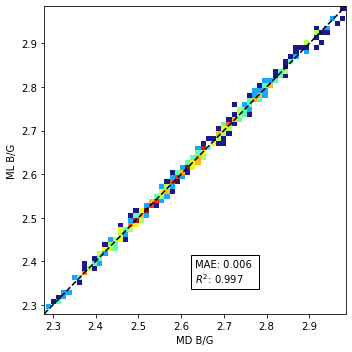

In [21]:
# 画出预测值和真实值的散点图
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()

ax.hist2d(data_test_y, gbr_pridict, norm=matplotlib.colors.LogNorm(), bins=64, cmap='jet', alpha=0.9)

ax.set_xlim(ax.get_ylim())
ax.set_ylim(ax.get_xlim())

mae = sklearn.metrics.mean_absolute_error(data_test_y, gbr_pridict)
r2 = sklearn.metrics.r2_score(data_test_y, gbr_pridict)
ax.text(0.5, 0.1, 'MAE: {:.3f} \n$R^2$: {:.3f}'.format(mae, r2), transform=ax.transAxes, bbox={'facecolor': 'w', 'edgecolor': 'k'})

ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--')

ax.set_xlabel('MD B/G')
ax.set_ylabel('ML B/G')

fig.set_size_inches(5, 5)
fig.tight_layout()
fig.show()

### 3. extreme gradient boosting(XGBoost)

In [ ]:
from xgboost import XGBRegressor

model_gbr = XGBRegressor()
param_grid_simple = {'n_estimators': list(range(100, 1000, 100)), 'max_depth': list(range(1, 10, 1)), 'learning_rate': [0.1, 0.01, 0.001], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}
search_gbr = GridSearchCV(estimator=model_gbr, param_grid=param_grid_simple, cv=5, scoring='neg_mean_squared_error')
search_gbr.fit(data_fit_X, data_fit_y)

print('网格搜索-度量记录：',search_gbr.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search_gbr.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search_gbr.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search_gbr.best_estimator_)  # 获取最佳度量时的分类器模型